# Coursework TensorFlow
# Machine Learning & Big-Data

---

## Overview

This coursework is provided as a Jupyter notebook, which you will need to complete.  

Throughout the notebook you will need to complete code, analytic exercises (if equations are required please typeset your solutions using latex in the markdown cell provided) and descriptive answers. Much of the grading of the coursework will be performed automatically, so it is critical you name your variables as requested.

Before you turn this coursework in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says "YOUR ANSWER HERE" or `YOUR CODE HERE` and remove remove the `raise NotImplementedError()` exceptions that are thrown before you have added your answers. Do not add and remove cells but rather provide your answers in the spaces given.

Please also:

- Make sure you use a python environment using the `requirements.txt` files provided by the course.
- Make sure your notebook executes without errors.
- Do not add and remove cells but only provide your answers in the spaces given.
- Do not add or change code in the cells other than the ones marked with `# YOUR CODE HERE`.
- Do not overwrite or rename any existing variables.
- Do not install code or packages in the notebooks.
- Do not import any libraries other than modules from `sklearn` or `tensorflow`.
- Always label your plots.
- Answer the questions concisely and show your work/derivations/reasoning.

**Please rename the notebook filename to include your candidate number in the filename. And please also add your candidate number below:**

In [ ]:
CANDIDATE_NUMBER = ""

You will be able to run some basic tests in the notebook to check the basic operation of your code is as expected.  Although do not assume your responses are complete or fully correct just because the basic tests pass.

Once you have renamed the notebook file and completed the exercises, please upload the notebook to Moodle.


---

## Dependencies

- Standard course dependencies (e.g. numpy, scikit-learn, etc.)
- [TensorFlow](https://www.tensorflow.org/)
- [TensorFlow DataSets](https://www.tensorflow.org/datasets)

---

Notes for people running the notebook in Google Colab:

- This notebook uses quite a bit of RAM (the solutions run with ~8.5Gb of RAM), which means that if you are very inefficient in your memory usage, it will not fit within Colab's limits of 12Gb. If this is the case, you can try restarting the runtime to free up memory of variables you have created and that you no longer use or write your code in a more efficient way.
- You can enable a Runtime with GPU acceleration for faster training (Runtime -> Change runtime type)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
def check_var_defined(var):
    try:
        exec(var)
    except NameError:
        raise NameError(var + " not defined.")
    else:
        print(var + " defined.")

# Part 1: Data pre-processing


In these exercises we will look at the classification of flowers into 5 different classes using convolutional neural networks (CNNs). The implementation of this will be done using TensorFlow (TF).

The dataset can be loaded in using the [Tensorflow Datasets](https://www.tensorflow.org/datasets) package. Below you see how we load in the data and change it from a TF generator object into a list of the images and a list of the targets. 

In [ ]:
# Load data
data = tfds.load("tf_flowers", split=["train"], as_supervised=True)

In [ ]:
images, targets = zip(*[i for i in data[0]])
labels = ["dandelion", "daisy", "tulips", "sunflowers", "roses"]

_Plot the first two images and their classes by writing a function `show_image`. Set the title of the images to be the class (use the actual label, not the number) it belongs to._ 

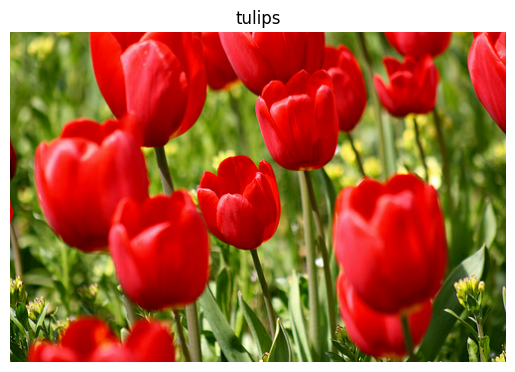

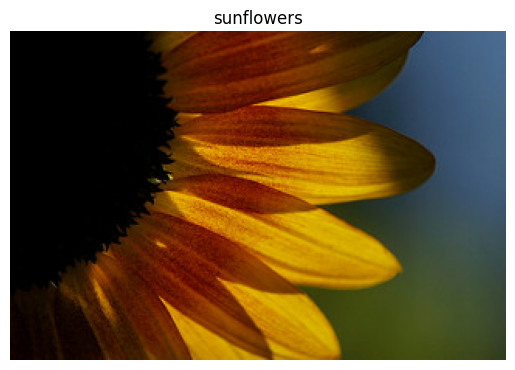

In [ ]:
def show_image(image, target):
    # YOUR CODE HERE
    plt.imshow(image)
    plt.title(labels[target])
    plt.axis("off")
    plt.show()


for i in range(2):
    show_image(images[i], targets[i])

Before we can use the data to train neural networks, we need to pre-process the data such that:
    
- the images are all the same shape (224,224)
- the images, originally with values (0, 255), are mapped to have values between (0, 1)
- the labels are represented as one-hot vectors

_Write a function to rescale and resize the images._

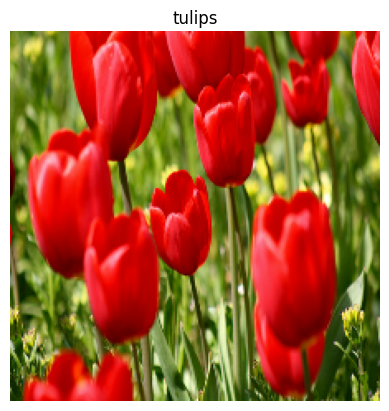

In [ ]:
def rescale_and_resize(image):
    # YOUR CODE HERE
    preprocessed_image = tf.image.resize(image, (224, 224))
    preprocessed_image = preprocessed_image / 255.0
    return preprocessed_image


show_image(rescale_and_resize(images[0]), targets[0])

In [ ]:
check_var_defined("rescale_and_resize")

rescale_and_resize defined.


_Now use the function to pre-process the data in the variable `images` and save the preprocessed images in an np.ndarray `images_preprocessed`._

In [ ]:
# YOUR CODE HERE
images_preprocessed = []
for i in images:
    image = rescale_and_resize(i)
    images_preprocessed.append(image)

images_preprocessed = np.array(images_preprocessed)

In [ ]:
check_var_defined("images_preprocessed")
assert type(images_preprocessed) == np.ndarray, (
    "Make sure to store your answer as a np.ndarray"
)

images_preprocessed defined.


One approach to represent the image labels so that they can be trainable by a neural network is to represented them as a one-hot vector. 

_Write a function `one_hot_encoding` that takes the integer label and returns a one-hot vector of the label._

In [ ]:
def one_hot_encoding(target):
    # YOUR CODE HERE
    encode = np.zeros(len(labels), dtype=np.float32)
    encode[target] = 1.0
    return encode


print(f"target: {targets[0]}, encoding: {one_hot_encoding(targets[0])}")

target: 2, encoding: [0. 0. 1. 0. 0.]


_Now use the function `one_hot_encoding` to create an np.ndarray of the one-hot representations of all the labels in `targets` and save them in `targets_preprocessed`._

In [ ]:
# YOUR CODE HERE
targets_preprocessed = []
for target in targets:
    preprocess = one_hot_encoding(target)
    targets_preprocessed.append(preprocess)
targets_preprocessed = np.array(targets_preprocessed)

In [ ]:
check_var_defined("targets_preprocessed")
assert type(targets_preprocessed) == np.ndarray, (
    "Make sure to store your answer as a np.ndarray"
)

targets_preprocessed defined.


In this notebook you will train different models and compare them against each other. 

Now that the data is pre-processed. We will split the data in three datasets, a train, validation and test set. 

_Why do we need these three sets and what do we use them for._

### Answer:
To ensure proper model training, tuning, and evaluation as the training set is used to learn patterns by adjusting the model’s parameters, the validation set helps fine-tune hyperparameters and detect overfitting by evaluating performance on unseen data during training, and the test set provides a final, unbiased assessment of how well the model generalizes to completely new data. This separation ensures that the reported performance is accurate and not influenced by data the model has already seen.

_Now split the data such that we have a train set with 80\% of the samples and a validation and test set each with 10\% of the samples. Save the results in `x_train`, `y_train`, `x_val`, `y_val`, `x_test`, and `y_test`._

In [ ]:
from sklearn.model_selection import train_test_split

tf.keras.utils.set_random_seed(371947)
# YOUR CODE HERE
x_train, x_temp, y_train, y_temp = train_test_split(
    images_preprocessed, targets_preprocessed, test_size=0.2, random_state=42
)

x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42
)
print(
    f"Train samples: {len(x_train)}, Validation samples: {len(x_test)}, Test samples: {len(x_val)}"
)

Train samples: 2936, Validation samples: 367, Test samples: 367


In [ ]:
check_var_defined("x_train")
check_var_defined("y_train")

check_var_defined("x_val")
check_var_defined("y_val")

check_var_defined("x_test")
check_var_defined("y_test")

x_train defined.
y_train defined.
x_val defined.
y_val defined.
x_test defined.
y_test defined.


WARNING: Before we continue we delete the variable `images_preprocessed` (you don't need that anymore) to manage our RAM consumption. If you want to use that variable again you will have to rerun the cell that creates it.

In [16]:
# Freeing up RAM by deleting this variable
del images_preprocessed

# Part 2: Training a basic CNN model 

Now that we have pre-processed the data and split it into different parts for training, validation and testing, you can start training some neural networks. 

Our model will take as input the $224 \times 224$ rgb (3-channel) images and will give as output a length five vector of which the different elements correspond to the five different classes. 

The model will start with convolutional layers followed by a hidden dense layer and then the final dense layer that gives us our output. 

_What kind of activation function should we use on the convolutional, dense and output layers and why these specific activation functions? (motivate your answers)_

### Answer:
For convolutional and hidden dense layers, ReLU is typacilly used as activation function as it speeds up training and helps avoid issues like vanishing gradients. But for the final dense layer Softmax is used, because it deals with multi-class classification as it ensures that the model’s output is a probability distribution across all classes, summing to 1.

_Create a model using the `tf.keras.models.Sequential()` model and add to that:_

- Input layer: A 2D convolutional layer with 8 filters, a 3x3 kernel and the ReLU activation function. Specify that this layer has an `input_shape` of (224, 224, 3)_ 
- A 2D MaxPool layer with strides 2x2

- A 2D convolutional layer with 16 filters, a 3x3 kernel and a the ReLU activation function
- A 2D MaxPool layer with strides 2x2

- A 2D convolutional layer with 32 filters, a 3x3 kernel and a the ReLU activation function
- A 2D MaxPool layer with strides 2x2

- A 2D convolutional layer with 32 filters, a 3x3 kernel and a the ReLU activation function
- A 2D MaxPool layer with strides 2x2

- A Flatten layer to flatten the filters to a single vector
- A Dense layer with 32 nodes and your chosen activation

- Output layer: A Dense layer with 5 nodes and your chosen activation

_Store the model in the variable `model_basic`._

In [ ]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(93612)

# YOUR CODE HERE
model_basic = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(
            filters=8, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 3)
        ),
        tf.keras.layers.MaxPooling2D(strides=(2, 2)),
        tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(strides=(2, 2)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(strides=(2, 2)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(strides=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=32, activation="relu"),
        tf.keras.layers.Dense(units=5, activation="softmax"),
    ]
)


C:\Users\User\Documents\Machine Learning with Big-Data\Coursework\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
check_var_defined("model_basic")

model_basic defined.


To compile the model we need to specify a loss function. 

_What loss function would be appropriate for this multi-class classfication problem?_

_Also, during training we would like to monitor how well our model performs on predicting the targets. What would be a good metric to track? Motivate your answers._ 

### Answer:
The suitable loss function is categorical cross-entropy, as it is used when the output layer has a softmax activation function and the labels are one-hot encoded. It ensures that the model learns efficiently by calculating the difference between the predicted probability distribution and the actual distribution.

To monitor the performance, one appropriate metric would be accuracy. Besides that it's a standard evaluation metric for classification tasks, it also measures the likelihood of the predicted class against the actual class.

Now compile the model using the `Adam` optimiser (with a `learning_rate` of 1e-4), your chosen loss, and your chosen metric to track. (Tip: TF has some loss function and metrics implemented in [tf.keras.losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses) and [tf.keras.metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics).)

In [ ]:
# YOUR CODE HERE
model_basic.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

In [ ]:
check_var_defined("model_basic")

model_basic defined.


_Now fit the train data for 10 epochs and save the training history in the variable `history_basic`. Also specify the `validation_data` and a `batch_size` of 32._

In [ ]:
tf.keras.utils.set_random_seed(47290)
# YOUR CODE HERE
history_basic = model_basic.fit(
    x_train, y_train, epochs=10, validation_data=(x_val, y_val), batch_size=32
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - categorical_accuracy: 0.2713 - loss: 1.5903 - val_categorical_accuracy: 0.3951 - val_loss: 1.4485
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - categorical_accuracy: 0.4379 - loss: 1.3834 - val_categorical_accuracy: 0.5014 - val_loss: 1.2212
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 138ms/step - categorical_accuracy: 0.4973 - loss: 1.2051 - val_categorical_accuracy: 0.5259 - val_loss: 1.1339
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 137ms/step - categorical_accuracy: 0.5384 - loss: 1.1271 - val_categorical_accuracy: 0.5695 - val_loss: 1.0854
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - categorical_accuracy: 0.5633 - loss: 1.0772 - val_categorical_accuracy: 0.5886 - val_loss: 1.0465
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 141ms/step - categorical_accuracy: 0.5751 - loss: 1.0362 - val_categorical_accuracy: 0.6076 - val_loss: 1.0222
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - categorical_accuracy: 0.600

In [ ]:
check_var_defined("history_basic")

history_basic defined.


_Now to see how the model performs, write a function `plot_metrics` that plots the loss for the train and validation set. In the same function also create a separate plot that plots the other metric for the train and validation set._

dict_keys(['categorical_accuracy', 'loss', 'val_categorical_accuracy', 'val_loss'])


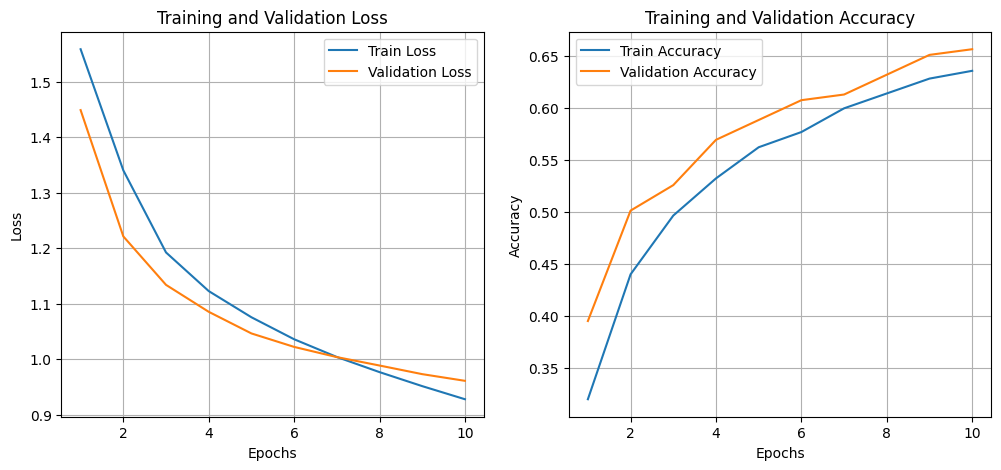

In [ ]:
def plot_metrics(history):
    # YOUR CODE HERE
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="Train Loss")
    plt.plot(epochs, val_loss, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.grid(True)

    accuracy = history.history["categorical_accuracy"]
    val_accuracy = history.history["val_categorical_accuracy"]
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="Train Accuracy")
    plt.plot(epochs, val_accuracy, label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.legend()
    plt.grid(True)


print(history_basic.history.keys())
plot_metrics(history_basic)

_Comment on the performance of the model based the tracked loss and metric_

### Answer:
The decreasing trend in both training and validation losses indicates that the model is learning effectively. However, while the validation loss drops initially, it eventually levels off and even shows a slight increase, hinting at overfitting, where the model memorizes patterns from the training data instead of generalizing to new inputs.

Likewise, training accuracy steadily improves, but validation accuracy reaches a plateau after a few epochs, suggesting that the model struggles to enhance its performance on unseen data. Although the model performs well on the training set, its generalization ability remains limited.

*What happens if we were to train the model for more epochs? What will happen to the performance of the model?*

### Answer:
If we train the model for more epochs, the training loss will likely continue to drop and the training accuracy will keep rising. However, the model may start to overfit, meaning that the improvements in validation performance could slow down, plateau, or even decline, resulting in a larger gap between training and validation metrics.

*Write a function `model_predict` that takes the model and some image data and returns the predicted targets (as integers corresponding to the predicted labels).* 

In [ ]:
def model_predict(model, x):
    # YOUR CODE HERE
    predict = model.predict(x)
    predicted_targets = np.argmax(predict, axis=1)
    return predicted_targets

_Gather the targets of the test set (scalar integer value corresponding to the labels) and save them in `test_targets`._

_Compute the targets for `model_basic` and store them in the variable `test_targets_basic`._

In [ ]:
# YOUR CODE HERE
test_targets = np.argmax(y_test, axis=1)
test_targets_basic = model_predict(model_basic, x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


In [ ]:
check_var_defined("test_targets")
check_var_defined("test_targets_basic")

assert test_targets.ndim == 1, (
    "Make sure you are only predicting the scalar label value not the one hot vectors"
)
assert test_targets_basic.ndim == 1, (
    "Make sure you are only predicting the scalar label value not the one hot vectors"
)

test_targets defined.
test_targets_basic defined.


_Calculate the precision and recall averaged over the 5 classes. (Precision and recall for each classes and then avaraged in one score)_

In [ ]:
from sklearn.metrics import precision_score, recall_score


def average_recall_precision(y, y_predict):
    # YOUR CODE HERE
    precision_classes = precision_score(y, y_predict, average=None)
    recall_classes = recall_score(y, y_predict, average=None)

    precision = np.mean(precision_classes)
    recall = np.mean(recall_classes)

    print(f"Average Recall: {recall:.3f}, Average Precision {precision:0.3f}")
    return recall, precision


recall_basic, precision_basic = average_recall_precision(
    test_targets, test_targets_basic
)

Average Recall: 0.580, Average Precision 0.591


In [ ]:
check_var_defined("recall_basic")
check_var_defined("precision_basic")

recall_basic defined.
precision_basic defined.


_Show the predicted targets in a confusion matrix. Show the predicted labels in percentages (percentage of the samples from true class labeled as predicted class) and add the labels to the axes._

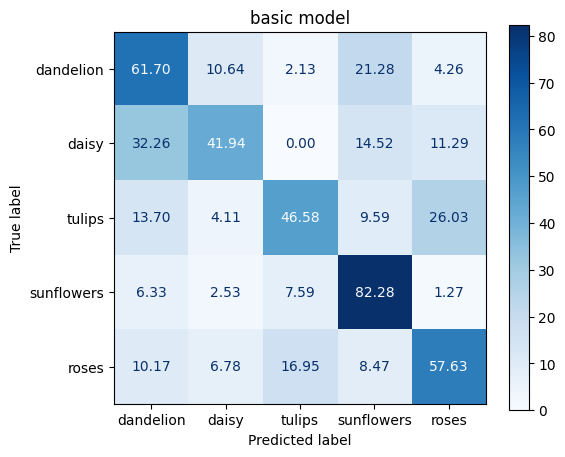

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


def plot_confusion_matrix(y, y_pred, title=""):
    # YOUR CODE HERE

    cm = confusion_matrix(y, y_pred, normalize="true") * 100
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    fig, ax = plt.subplots(figsize=(6, 5))
    cm_display.plot(cmap="Blues", ax=ax, values_format=".2f")
    plt.title(title)
    plt.show()


plot_confusion_matrix(test_targets, test_targets_basic, "basic model")

_Comment on the recall and precision of the model, as well as the predictions in the confusion matrix._

### Answer:
The model’s average recall and precision are both over 50%, indicating that it correctly identifies and predicts more than half of the samples for each class. The confusion matrix reveals that some classes are identified consistently, while others are frequently misclassified. Overall, this suggests that the model exhibits a moderate level of performance as it distinguishes certain classes effectively but still has difficulty accurately differentiating others.

# Part 3: Improving the model

To improve on the model we will include some Dropout layers. 

_What do dropout layers do and why might this increase the performance of our models?_

### Answer:
Dropouts are introduced as a regularization technique to reduce overfitting. During training, it drops neurons in the network to force the model to learn more robust, generalizable features because it can’t rely on any single neuron or subset of neurons.

Another method to improve the model is by using a technique called data augmentation. 

_Explain the concept data augmentation and explain how it might increase the performance of our model._

### Answer:
Data augmentation can be considered a regularization technique and a means to expand the volume of the training dataset. It basically creates new training example from the original training set and applies various strategies to the data. In our case, these strategies might involve rotations, flips, shifts, and scaling. Because it increases the diversity of the training set, it will assist the model in learning more invariant features and reducing overfitting. Thus, the performance will become better on unseen data.

_Use the exact same model as for the `model_basic`, but play around with adding in a data augmentation layer (e.g. [tf.keras.layers.RandomFlip](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip) ) and adding in dropout layers (dropout is typically only added in the dense part of the network). Store the new model in the variable `model_dropout` and compile it using the same metrics and loss as before._

In [ ]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(48263)

# YOUR CODE HERE
data_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip("horizontal")])
model_dropout = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(
            filters=8, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 3)
        ),
        data_augmentation,
        tf.keras.layers.MaxPooling2D(strides=(2, 2)),
        tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(strides=(2, 2)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(strides=(2, 2)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(strides=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=32, activation="relu"),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(units=5, activation="softmax"),
    ]
)

model_dropout.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)


C:\Users\User\Documents\Machine Learning with Big-Data\Coursework\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
check_var_defined("model_dropout")
model_dropout.summary()

model_dropout defined.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 222, 222, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         147,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 162,933 (636.46 KB)

 Trainable params: 162,933 (636.46 KB)

 Non-trainable params: 0 (0.00 B)

_Fit the new model in the same way as before and save the history in `history_dropout`. However, train for 20 epochs instead of 10._

In [ ]:
tf.keras.utils.set_random_seed(103745)
# YOUR CODE HERE
history_dropout = model_dropout.fit(
    x_train, y_train, epochs=20, validation_data=(x_val, y_val), batch_size=32
)

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 199ms/step - categorical_accuracy: 0.2283 - loss: 1.6049 - val_categorical_accuracy: 0.2480 - val_loss: 1.5414
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 189ms/step - categorical_accuracy: 0.2875 - loss: 1.5205 - val_categorical_accuracy: 0.2861 - val_loss: 1.4396
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 189ms/step - categorical_accuracy: 0.3476 - loss: 1.4521 - val_categorical_accuracy: 0.3896 - val_loss: 1.3665
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 189ms/step - categorical_accuracy: 0.4008 - loss: 1.3826 - val_categorical_accuracy: 0.4360 - val_loss: 1.3028
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 188ms/step - categorical_accuracy: 0.4357 - loss: 1.3240 - val_categorical_accuracy: 0.4687 - val_loss: 1.2482
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - categorical_accuracy: 0.4697 - loss: 1.2700 - val_categorical_accuracy: 0.5313 - val_loss: 1.2003
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 187ms/step - categorical_accuracy: 0.487

In [ ]:
check_var_defined("history_dropout")

history_dropout defined.


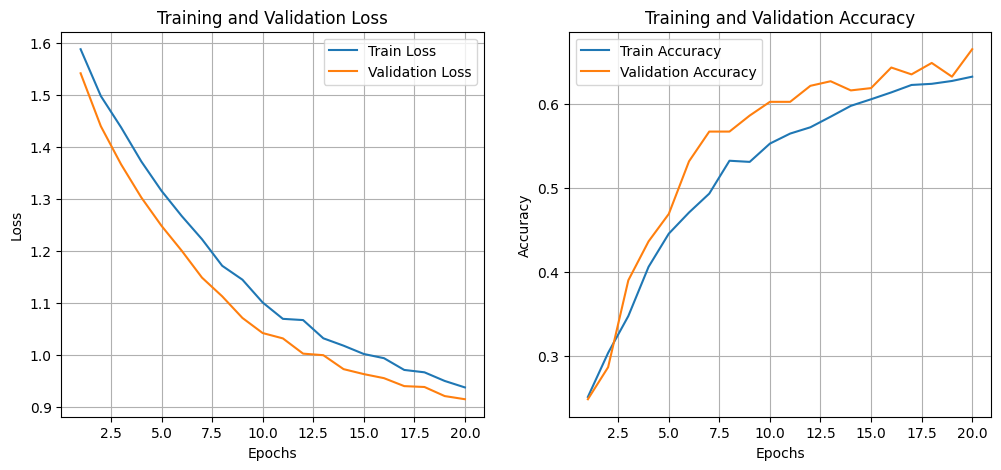

In [34]:
plot_metrics(history_dropout)

_Comment on the performance of the improved model based on the loss and metrics during training._

### Answer:
The inclusion of dropout layers and data augmentation has helped improve the model’s generalization as both training and validation losses continue to decrease steadily, indicating effective learning. Unlike previous models, validation loss closely follows training loss, suggesting a reduction in overfitting.

Similarly, validation accuracy keeps improving alongside training accuracy and does not plateau too early, demonstrating better performance on unseen data. This suggests that data augmentation has helped the model learn more diverse patterns, while dropout has encouraged it to rely less on specific features, leading to a more robust model overall.

_Why did we have to train the model for more epochs than the basic model?_

### Answer:
After adding dropout and data augmentation, the model requires more epochs to converge. Dropout lessens overfitting but can slow the learning process, and augmented data expands the variation in training samples, demanding extra epochs for the model to fully adapt to this broader range.

Now we evaluate our model on the test set using the functions you wrote before

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
Average Recall: 0.605, Average Precision 0.621


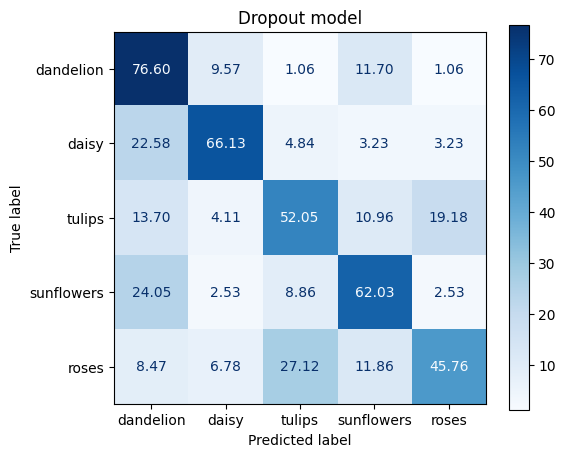

In [ ]:
test_targets_dropout = model_predict(model_dropout, x_test)
recall_dropout, precision_dropout = average_recall_precision(
    test_targets, test_targets_dropout
)
plot_confusion_matrix(test_targets, test_targets_dropout, "Dropout model")

In [ ]:
check_var_defined("test_targets_dropout")
check_var_defined("recall_dropout")

test_targets_dropout defined.
recall_dropout defined.


In [ ]:
check_var_defined("test_targets_dropout")
check_var_defined("precision_dropout")

test_targets_dropout defined.
precision_dropout defined.


_Comment on the precision and recall of the model as well as the predictions in the confusion matrix_

### Answer:
Both recall and precision are now approximately over 60%, indicating that the model is doing better at detecting classes, and the confusion matrix shows an improvement in classifying certain categories compared to the basic model. There is a noticeable increase in correctly predicted instances for some classes, such as "dandelion" and "sunflowers," which indicates that the model has learned more robust features and is generalizing better. However, some misclassifications still persist.

# Part 4: Transfer learning

In order to improve our model even further, we will make use of transfer learning. 

_Explain in your own words what tranfer learning means and why it would help in our particular case._

### Answer:
Transfer learning means adapting a deep network that was trained on one task to a new, but structurally similar, task. In this method, we leverage the initial layers of a pre-trained model which are adept at detecting basic features like edges, textures, and shapes and then fine-tune the later layers for our specific task. This method provides a strong foundation for feature extraction, allowing the model to learn faster and perform better without starting from scratch.

Below you can see how we load in a pre-trained MobileNet that is trained on the ImageNet datastet. By not including the top part of the network we get only the convolutional layers and can add our own dense layers after that. We set all the layers of the MobileNet as not trainable, since this would be computationally expensive to do and we also want to avoid overfitting. Instead we will only be training the dense part. 

In [ ]:
mobilenet = tf.keras.applications.mobilenet.MobileNet(
    input_shape=(224, 224, 3), include_top=False, weights="imagenet"
)

for layer in mobilenet.layers:
    layer.trainable = False

print("Output shape of the MobileNet: ", mobilenet.output_shape)

Output shape of the MobileNet:  (None, 7, 7, 1024)


_Use a sequential model and add the MobileNet, followed by a MaxPool2D layer, and then the dense part of the network which you can use the same as we have used in the previous models. Store the model in the variable `model_mobilenet`. Compile the model using the same metrics, loss and optimiser as before._

In [ ]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(387453)

# YOUR CODE HERE
model_mobilenet = tf.keras.models.Sequential(
    [
        mobilenet,
        tf.keras.layers.MaxPooling2D(strides=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=32, activation="relu"),
        tf.keras.layers.Dense(units=5, activation="softmax"),
    ]
)

model_mobilenet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

In [ ]:
check_var_defined("model_mobilenet")
model_mobilenet.summary()

model_mobilenet defined.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 3, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         294,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,523,973 (13.44 MB)

 Trainable params: 295,109 (1.13 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

*Train the model in the same way as before, for 10 epochs.*

In [ ]:
tf.keras.utils.set_random_seed(9673)
# YOUR CODE HERE
history_mobilenet = model_mobilenet.fit(
    x_train, y_train, epochs=10, validation_data=(x_val, y_val), batch_size=32
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 65s 631ms/step - categorical_accuracy: 0.5064 - loss: 1.5145 - val_categorical_accuracy: 0.7847 - val_loss: 0.5758
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 56s 611ms/step - categorical_accuracy: 0.8559 - loss: 0.4081 - val_categorical_accuracy: 0.8283 - val_loss: 0.4617
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 82s 609ms/step - categorical_accuracy: 0.9252 - loss: 0.2260 - val_categorical_accuracy: 0.8474 - val_loss: 0.4266
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 604ms/step - categorical_accuracy: 0.9655 - loss: 0.1347 - val_categorical_accuracy: 0.8747 - val_loss: 0.3986
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 56s 604ms/step - categorical_accuracy: 0.9881 - loss: 0.0837 - val_categorical_accuracy: 0.8719 - val_loss: 0.4005
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 83s 610ms/step - categorical_accuracy: 0.9959 - loss: 0.0521 - val_categorical_accuracy: 0.8665 - val_loss: 0.3920
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 82s 610ms/step - categorical_accuracy: 0.998

In [ ]:
check_var_defined("history_mobilenet")

history_mobilenet defined.


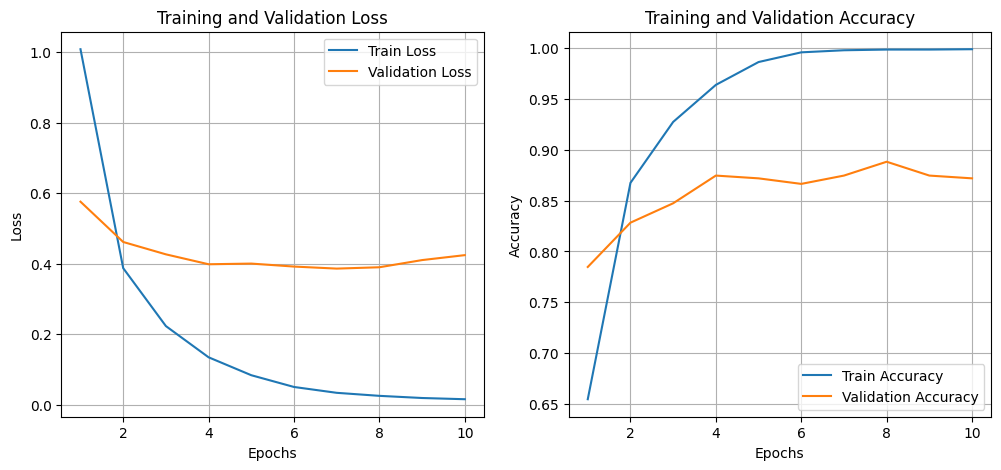

In [43]:
plot_metrics(history_mobilenet)

12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 627ms/step
Average Recall: 0.823, Average Precision 0.821


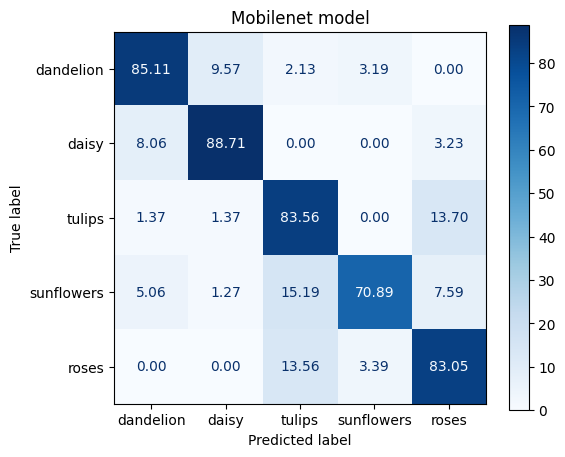

In [ ]:
test_targets_mobilenet = model_predict(model_mobilenet, x_test)
recall_mobilenet, precision_mobilenet = average_recall_precision(
    test_targets, test_targets_mobilenet
)
plot_confusion_matrix(test_targets, test_targets_mobilenet, "Mobilenet model")

In [ ]:
check_var_defined("test_targets_mobilenet")
check_var_defined("recall_mobilenet")


test_targets_mobilenet defined.
recall_mobilenet defined.


In [ ]:
check_var_defined("precision_mobilenet")


precision_mobilenet defined.


_Comment on the results from the transfer-learned model and why the results differ to the case considered previously without transfer learning._

### Answer:
The transfer-learned model achieves higher recall and precision than previous models, with approximately more than 80%. Furthermore, its training and validation metrics indicate that it converges more rapidly and generalizes more effectively, which can be attributed to the fact that the pre-trained MobileNet has already developed robust, general feature representations from a large dataset, and by leveraging these pre-existing features the model requires less data and training time to adapt to our specific classes, ultimately resulting in a stronger overall performance than previous models.

Moreover, the confusion matrix from the transfer learning model demonstrates a notable boost in classification accuracy, with most classes being correctly identified over 80% of the time. Fewer misclassifications suggest that utilizing pre-trained features has enhanced the model's ability to generalize across different flower categories.

_Suggest some ways the model could be improved further._

### Answer:
To improve the model further, we can try a few things like unfreeze some top layers of MobileNet and fine-tune them on our dataset to learn more specific features. We can also add more dense layers or increase the number of neurons in the classifier to improve performance. Adjusting hyperparameters like the learning rate, batch size, and dropout rate could help the model train better. Lastly, combining multiple models in an ensemble could further boost accuracy and generalization.